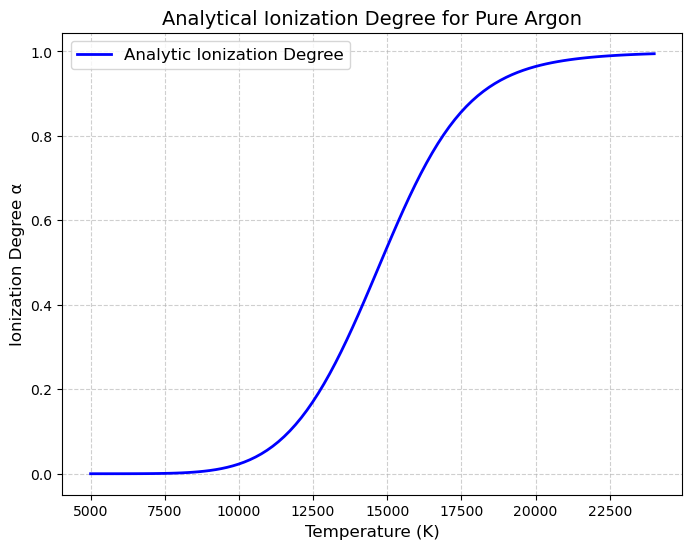

In [4]:
# %% [code]
import numpy as np
import matplotlib.pyplot as plt

# Constants (SI units)
k_B = 1.380649e-23  # Boltzmann constant (J/K)
h = 6.62607015e-34  # Planck's constant (J·s)
m_e = 9.10938356e-31  # Electron mass (kg)
e = 1.60218e-19  # Elementary charge (C)
J = 15.6 * e  # Ionization energy of Argon (Joules)
g_i = 6  # Statistical weight for ionized Argon
g_a = 1  # Statistical weight for neutral Argon
g_e = 2  # Statistical weight for free electrons
P_atm = 101325  # Atmospheric pressure in Pascals

def ionization_degree_analytic(T, P):
    """
    Computes the ionization degree (α) analytically using the Saha equation.
    
    The Saha equation gives the ratio of ionized to neutral species:
    
        α^2 + A * α - A = 0
    
    where:
        A = (g_i * g_e / g_a) * ((2 * π * m_e * k_B * T) / h^2)^(3/2) * exp(-J / (k_B * T)) * (k_B * T / P)

    We solve for α by taking the positive root of the quadratic equation.
    """
    # Compute the coefficient A from the Saha equation
    A = (g_i * g_e / g_a) * ((2 * np.pi * m_e * k_B * T) / h**2)**(3/2) * np.exp(-J / (k_B * T)) * (k_B * T / P)

    # Solve the quadratic equation: α^2 + A * α - A = 0
    alpha = (-A + np.sqrt(A**2 + 4*A)) / 2.  # Only the positive root is physically meaningful
    return alpha

# Define the temperature range (in Kelvin)
Temp = np.linspace(24000, 5000, 100)

# Choose a fixed pressure for analysis (in Pascals)
P_val = 1.0 * P_atm  # 1 atm in Pascals

# Compute ionization degree over the temperature range
alpha_vals = [ionization_degree_analytic(T, P_val) for T in Temp]

# Plot the results
plt.figure(figsize=(8, 6))

# Plot the ionization degree as a function of temperature
plt.plot(Temp, alpha_vals, color='b', linestyle='-', linewidth=2, label='Analytic Ionization Degree')

# Labels and Title
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Ionization Degree α', fontsize=12)
plt.title("Analytical Ionization Degree for Pure Argon", fontsize=14)

# Grid and Legend
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


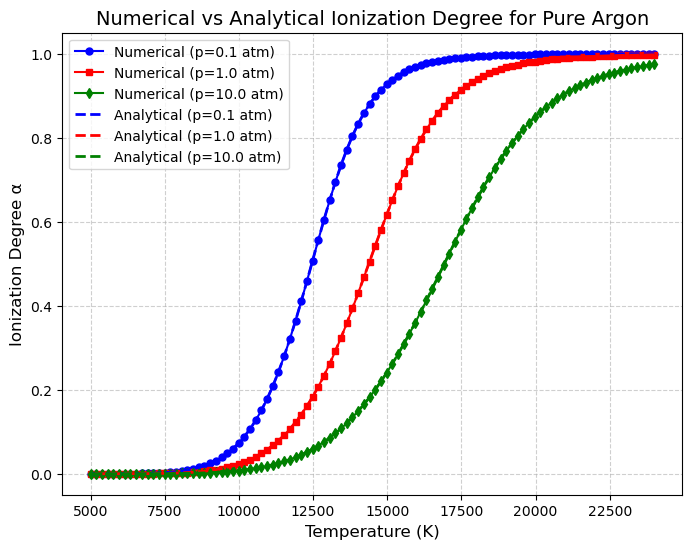

In [1]:
# %% [code]
import numpy as np
from sympy import nsolve
from sympy.abc import x, y, z
from matplotlib import pyplot as plt

# Constants
gi = 6.  # Statistical weight for ionized Argon
ge = 2.  # Statistical weight for electrons
ga = 1.  # Statistical weight for neutral Argon
m = 9.1093837e-31  # Electron mass (kg)
h = 6.62607015e-34  # Planck's constant (J s)
h_ = h / (2 * np.pi)  # Reduced Planck's constant
k = 1.380649e-23  # Boltzmann constant (J/K)
e = 1.60218e-19  # Elementary charge (C)
J = 15.6 * e  # Ionization energy in Joules (15.6 eV)
P_atm = 101325  # Atmospheric pressure in Pascals
p = [0.1, 1.0, 10.0]  # Pressure values in atm
R = 8.314  # Gas constant (J/(mol·K))
Na = 6.02214076e23  # Avogadro's number

# Temperature range (K)
Temp = np.linspace(24000, 5000, 100)

# Saha function: Computes the ionization balance factor
def f(T, P):
    return (gi * ge / ga) * (m * k * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J / (k * T)) / Na

# Electron density from the Saha equation
def n_e(T, P):
    return -f(T, P) + np.sqrt(f(T, P)**2 + f(T, P) * P / (R * T))

# Neutral atom density from the equation of state
def n_a(T, P):
    return P / (R * T) - 2 * n_e(T, P)

# Ionization degree (α) - Analytical
def alpha(T, P):
    return n_e(T, P) / (n_e(T, P) + n_a(T, P))

# Storage for numerical solutions
n = [1.0, 1.0, 0.0]  # Initial guess for numerical solver
dat = [[] for _ in p]  # Storage for numerical ionization degrees

# Numerical solution for n_e, n_i, n_a
for i in range(len(p)):
    for T in Temp:
        # Solve for electron density, ion density, and neutral density
        n = nsolve([
            x * y - z * f(T, p[i] * P_atm),  # Saha equation
            (p[i] * P_atm) / (R * T) - x - y - z,  # Equation of state
            x - y  # Electron neutrality (n_e = n_i)
        ], [x, y, z], n)
        
        # Compute and store the ionization degree
        dat[i].append(n[0] / (n[0] + n[2]))

# Define colors and markers
colors = ['b', 'r', 'g']  # Blue, Red, Green for different pressures
markers = ['o', 's', 'd']  # Circle, Square, Diamond markers for numerical solutions

# Plot results
plt.figure(figsize=(8, 6))

for i in range(len(p)):
    plt.plot(Temp, dat[i], linestyle='-', marker=markers[i], markersize=5, color=colors[i], linewidth=1.5,
             label=f'Numerical (p={p[i]} atm)')

# Plot analytical solutions as dashed lines
for i, p_ in enumerate(p):
    plt.plot(Temp, [alpha(T, p_ * P_atm) for T in Temp], linestyle='--', linewidth=2, color=colors[i],
             label=f'Analytical (p={p_} atm)')

# Labels and Title
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Ionization Degree α', fontsize=12)
plt.title("Numerical vs Analytical Ionization Degree for Pure Argon", fontsize=14)

# Grid and Legend
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


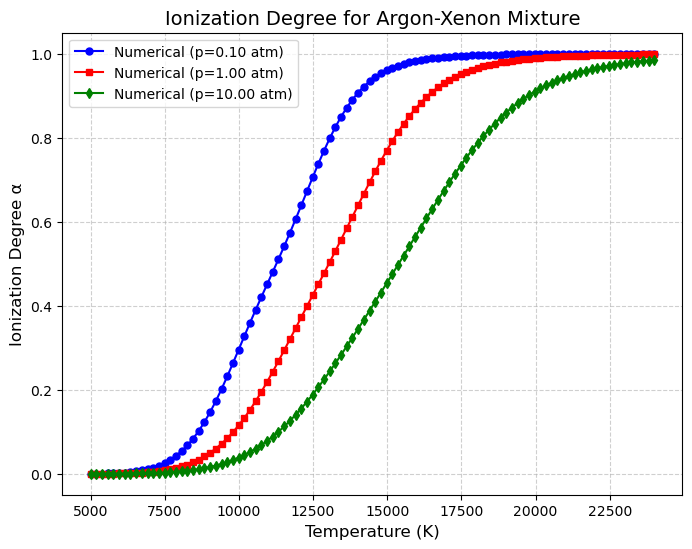

In [2]:
# %% [code]
import numpy as np
from sympy import nsolve
from sympy.abc import x, y, z, u, v
from matplotlib import pyplot as plt

# Constants
gi = 6.  # Statistical weight for ionized species
ge = 2.  # Statistical weight for electrons
ga = 1.  # Statistical weight for neutral species
m = 9.1093837e-31  # Electron mass (kg)
h_ = 1.0545718e-34  # Reduced Planck's constant (J s)
k = 1.380649e-23  # Boltzmann constant (J/K)
J1 = 15.6 * 1.60218e-19  # Argon ionization energy (J)
J2 = 12.13 * 1.60218e-19  # Xenon ionization energy (J)
P_atm = 101325  # 1 atm in Pascals
p = [0.1 * P_atm, 1.0 * P_atm, 10.0 * P_atm]  # Pressures in Pascals
R = 8.314  # Gas constant (J/(mol·K))
Na = 6.024 * 10**23  # Avogadro's number
Temp = np.linspace(24000, 5000, 100)  # Temperature range

# Saha functions for Argon and Xenon
def f1(T):
    """ Saha factor for Argon """
    return (gi * ge / ga) * (m * k * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J1 / (k * T)) / Na

def f2(T):
    """ Saha factor for Xenon """
    return (gi * ge / ga) * (m * k * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J2 / (k * T)) / Na

def alpha(T, P, n):
    """ Computes the ionization degree α """
    return n[0] / (n[0] + n[3] + n[4])

# Initial guess for [n_e, n_a1, n_a2, n_i1, n_i2]
n = [0., 0., 0., 1., 1.]
dat = [[] for _ in p]  # Storage for ionization degree at different pressures

# Solve numerically for each temperature and pressure
for i in range(len(p)):
    for T in Temp:
        n = nsolve([
            x * y - u * f1(T),  # Saha equation for Argon
            x * z - v * f2(T),  # Saha equation for Xenon
            (p[i] / (T * R)) - x - y - z - u - v,  # Equation of state
            x - y - z,  # Electron conservation
            y + u - z - v  # Conservation of neutral/ion balance
        ], [x, y, z, u, v], n)
        dat[i].append(alpha(T, p[i], n))

# Define colors & markers for better visualization
colors = ['b', 'r', 'g']
markers = ['o', 's', 'd']

# Plot results
plt.figure(figsize=(8, 6))
for i in range(len(p)):
    plt.plot(Temp, dat[i], linestyle='-', marker=markers[i], markersize=5, color=colors[i], linewidth=1.5,
             label=f'Numerical (p={p[i] / P_atm:.2f} atm)')

# Labels and Title
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Ionization Degree α', fontsize=12)
plt.title("Ionization Degree for Argon-Xenon Mixture", fontsize=14)

# Grid and Legend
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

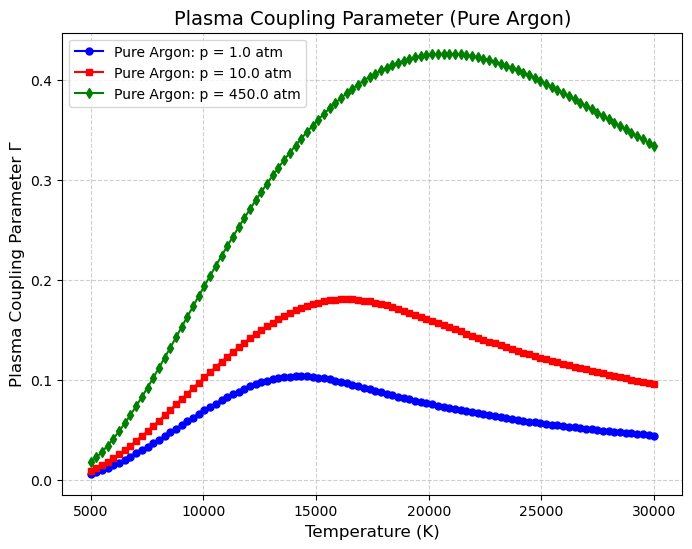

In [6]:
# %% [code]
import numpy as np
from sympy import nsolve
from sympy.abc import x, y, z
from matplotlib import pyplot as plt

# Constants
e = 1.60218e-19     # Elementary charge (C)
k_B = 1.380649e-23  # Boltzmann constant (J/K)
P_atm = 101325      # 1 atm in Pa
R = 8.314           # Gas constant (J/(mol·K))
Na = 6.02214076e23  # Avogadro's number
eps0 = 8.8542e-12   # Vacuum permittivity (F/m)

# Ionization Constants for Argon
gi = 6.
ge = 2.
ga = 1.
m = 9.1093837e-31  # Electron mass (kg)
h = 6.62607015e-34  # Planck's constant (J s)
h_ = h / (2 * np.pi)  # Reduced Planck constant
J = 15.6 * e  # Argon ionization energy (J)

# Temperature range & pressures (in atm)
Temp = np.linspace(30000, 5000, 100)
pressures_atm = [1.0, 10.0, 450.0]

# Saha function for pure Argon
def f(T, P):
    """ Computes the Saha factor for ionization equilibrium """
    return (gi * ge / ga) * (m * k_B * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J / (k_B * T)) / Na

# Function to compute numerical solution for electron density
def get_solution(T, P, guess):
    """ Solves for electron density numerically using nsolve """
    sol = nsolve([
        x * y - z * f(T, P),  # Saha equation
        P / (R * T) - x - y - z,  # Equation of state
        x - y  # Electron neutrality (n_e = n_i)
    ], [x, y, z], guess)
    return sol

# Plasma Coupling Parameter (Γ)
def Gamma(T, n_e):
    """ Computes the plasma coupling parameter Γ """
    return (e**2 / (4 * np.pi * eps0 * k_B * T)) * ((4 * np.pi * n_e * Na / 3) ** (1/3))

# Solve for Gamma at different temperatures & pressures
dat_G = {p_atm: [] for p_atm in pressures_atm}
initial_guess = [1.0, 1.0, 0.0]

for p_atm in pressures_atm:
    P_val = p_atm * P_atm  # Convert atm to Pa
    for T in Temp:
        sol = get_solution(T, P_val, initial_guess)  # Solve for electron density
        dat_G[p_atm].append(float(Gamma(T, sol[0])))  # Store Gamma
        initial_guess = sol  # Update initial guess for better convergence

# Define colors & markers
colors = ['b', 'r', 'g']
markers = ['o', 's', 'd']

# Plot Gamma vs Temperature
plt.figure(figsize=(8, 6))
for i, p_atm in enumerate(pressures_atm):
    plt.plot(Temp, dat_G[p_atm], linestyle='-', marker=markers[i], markersize=5, color=colors[i], linewidth=1.5,
             label=f'Pure Argon: p = {p_atm:.1f} atm')

# Labels and Title
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Plasma Coupling Parameter Γ', fontsize=12)
plt.title("Plasma Coupling Parameter (Pure Argon)", fontsize=14)

# Grid and Legend
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


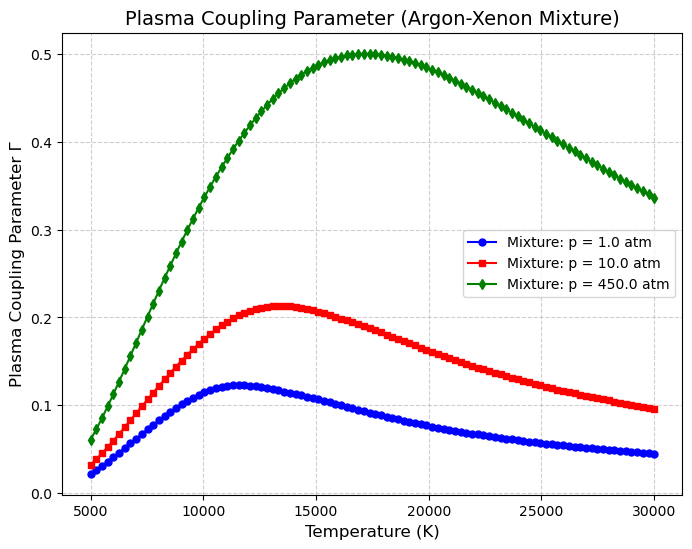

In [2]:
# %% [code]
import numpy as np
from sympy import nsolve
from sympy.abc import x, y, z, u, v
from matplotlib import pyplot as plt

# Constants
e = 1.60218e-19     # Elementary charge (C)
k_B = 1.380649e-23  # Boltzmann constant (J/K)
P_atm = 101325      # 1 atm in Pa
R = 8.314           # Gas constant (J/(mol·K))
Na = 6.02214076e23  # Avogadro's number
eps0 = 8.8542e-12   # Vacuum permittivity (F/m)

# Ionization Constants for Argon & Xenon
gi = 6.
ge = 2.
ga = 1.
m = 9.1093837e-31  # Electron mass (kg)
h = 6.62607015e-34  # Planck's constant (J s)
h_ = h / (2 * np.pi)  # Reduced Planck constant
J1 = 15.6 * e  # Argon ionization energy (J)
J2 = 12.13 * e  # Xenon ionization energy (J)

# Temperature range & pressures
Temp = np.linspace(30000, 5000, 100)
pressures_atm = [1.0, 10.0, 450.0]  # Example pressures

# Saha functions for Argon and Xenon
def f1(T):
    """ Saha factor for Argon """
    return (gi * ge / ga) * (m * k_B * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J1 / (k_B * T)) / Na

def f2(T):
    """ Saha factor for Xenon """
    return (gi * ge / ga) * (m * k_B * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J2 / (k_B * T)) / Na

# Plasma Coupling Parameter (Γ) for mixture
def Gamma(T, n_e):
    """ Computes the plasma coupling parameter Γ """
    return (e**2 / (4 * np.pi * eps0 * k_B * T)) * ((4 * np.pi * n_e * Na / 3) ** (1/3))

# Initial guess for [n_e, n_a1, n_a2, n_i1, n_i2]
n = [0., 0., 0., 1., 1.]
dat_G_mix = {p_atm: [] for p_atm in pressures_atm}

# Solve numerically for each temperature and pressure
for p_atm in pressures_atm:
    P_val = p_atm * P_atm
    for T in Temp:
        n = nsolve([
            x * y - u * f1(T),
            x * z - v * f2(T),
            (P_val / (T * R)) - x - y - z - u - v,
            x - y - z,
            y + u - z - v
        ], [x, y, z, u, v], n)
        dat_G_mix[p_atm].append(Gamma(T, n[0]))

# Define colors & markers
colors = ['b', 'r', 'g']
markers = ['o', 's', 'd']

# Plot results
plt.figure(figsize=(8, 6))
for i, p_atm in enumerate(pressures_atm):
    plt.plot(Temp, dat_G_mix[p_atm], linestyle='-', marker=markers[i], markersize=5, color=colors[i], linewidth=1.5,
             label=f'Mixture: p = {p_atm:.1f} atm')

# Labels and Title
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Plasma Coupling Parameter Γ', fontsize=12)
plt.title("Plasma Coupling Parameter (Argon-Xenon Mixture)", fontsize=14)

# Grid and Legend
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


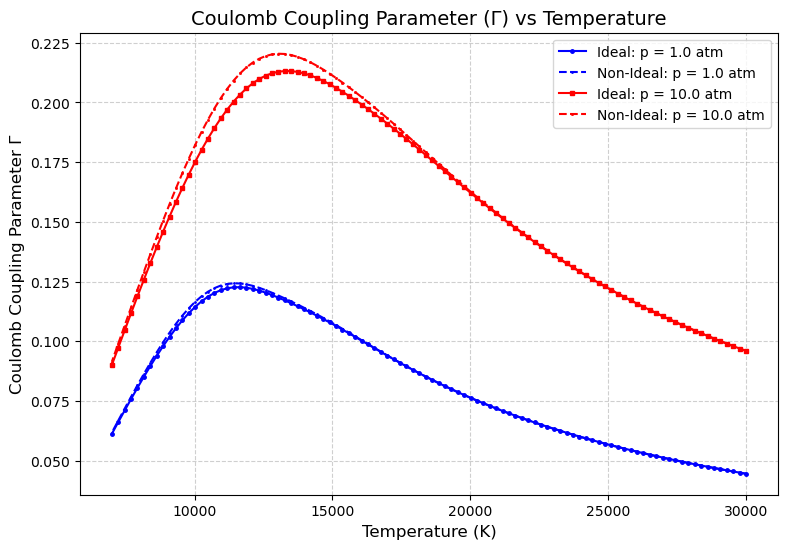

In [ ]:
# %% [code]
# 📚 Libraries
import numpy as np
from sympy import symbols, nsolve
from matplotlib import pyplot as plt

# 📌 **Constants**
gi, ge, ga = 6., 2., 1.  # Statistical weights for ions, electrons, neutral atoms
m = 9.1093837e-31   # Electron mass (kg)
h = 6.62607015e-34  # Planck's constant (J·s)
h_ = h / (2 * np.pi)  # Reduced Planck constant
k_B = 1.380649e-23  # Boltzmann constant (J/K)
e = 1.60218e-19  # Elementary charge (C)
J1 = 15.6 * e  # Ionization energy for species 1 (J)
J2 = 12.13 * e  # Ionization energy for species 2 (J)
P_atm = 101325  # Atmospheric pressure (Pa)
p = [1., 10.]  # Pressure fractions (atm) - Excluding 450 atm
R = 8.314  # Universal gas constant (J/(mol·K))
Na = 6.02214076e23  # Avogadro's number
epsilon_0 = 8.8542e-12  # Vacuum permittivity (F/m)

# 🌡 **Temperature range**
Temp = np.linspace(30000, 7000, 100)

# 📌 **Fixed Saha functions for ionization balance**
def f1(T, J):
    """ Computes Saha equilibrium factor for species 1 """
    return (gi * ge / ga) * (m * k_B * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J / (k_B * T)) / Na

def f2(T, J):
    """ Computes Saha equilibrium factor for species 2 """
    return (gi * ge / ga) * (m * k_B * T / (2 * np.pi * h_**2))**(3/2) * np.exp(-J / (k_B * T)) / Na

# 📌 **Debye Length Calculation**
def debye_length(T, n_e):
    """ Computes Debye length """
    return np.sqrt(epsilon_0 * k_B * T / (n_e * e**2))

# 📌 **Effective Ionization Energy with Screening**
def delta_I(r, lambda_D):
    """ Computes potential energy correction due to screening """
    return (r + 1) * e**2 / (4 * np.pi * epsilon_0 * lambda_D)

def effective_ionization_energy(J, r, lambda_D):
    """ Computes the screened ionization energy """
    return J - delta_I(r, lambda_D)

# 📌 **Coulomb Coupling Parameter Calculation**
def G(T, P, n):
    """ Computes the Coulomb coupling parameter Γ """
    return e**2 / (4 * np.pi * epsilon_0 * k_B * T) * (4 * np.pi * n * Na / 3)**(1/3)

# 📌 **Define Variables for Solver**
x, y, z, u, v = symbols('x y z u v')
n = [1e-6, 1e-6, 1e-6, 1e-6, 1e-6]  # Better initial guess

# 📌 **Storage for results**
dat_ideal = [[] for _ in range(len(p))]  # Without non-ideal effects
dat_non_ideal = [[] for _ in range(len(p))]  # With non-ideal effects
Temp_valid = [[] for _ in range(len(p))]  # Store valid temperatures for each pressure

# 🔄 **Solve equations and calculate Γ**
for i in range(len(p)):  # Loop over pressure values (only P = 1 atm and P = 10 atm)
    for T in Temp:  # Loop over temperature range
        try:
            # **Solve without non-ideal effects** (unscreened ionization energies)
            sol = nsolve([
                x * y - u * f1(T, J1),
                x * z - v * f2(T, J2),
                (p[i] * P_atm) / (T * R) - x - y - z - u - v,
                x - y - z,
                y + u - z - v],
                [x, y, z, u, v], n, tol=1e-10)  # Tolerance set to 1e-10
            
            n_ideal = [float(val) for val in sol]  # Convert to Python float
            dat_ideal[i].append(G(T, p[i] * P_atm, n_ideal[0]))  # Store Γ for ideal case

            # **Solve with non-ideal effects** (screened ionization energies)
            lambda_D = debye_length(T, n_ideal[0] * Na)  # Calculate Debye length
            J1_eff = effective_ionization_energy(J1, 1, lambda_D)  # Effective ionization energy for species 1
            J2_eff = effective_ionization_energy(J2, 1, lambda_D)  # Effective ionization energy for species 2

            sol = nsolve([
                x * y - u * f1(T, J1_eff),
                x * z - v * f2(T, J2_eff),
                (p[i] * P_atm) / (T * R) - x - y - z - u - v,
                x - y - z,
                y + u - z - v],
                [x, y, z, u, v], n_ideal, tol=1e-10)  # Tolerance set to 1e-10

            n_non_ideal = [float(val) for val in sol]  # Convert to Python float
            dat_non_ideal[i].append(G(T, p[i] * P_atm, n_non_ideal[0]))  # Store Γ for non-ideal case

            # Store valid temperature
            Temp_valid[i].append(T)

        except Exception as e:
            print(f"⚠️ Solver failed at T = {T} K, p = {p[i]} atm: {e}")
            continue

# 📊 **Plot results**
plt.figure(figsize=(9, 6))
colors = ['b', 'r']  # Colors for different pressures
markers = ['o', 's']  # Markers for ideal/non-ideal cases

for i in range(len(p)):
    plt.plot(Temp_valid[i], dat_ideal[i], linestyle='-', marker=markers[i], markersize=2.5, color=colors[i], linewidth=1.5,
             label=f'Ideal: p = {p[i]} atm')
    plt.plot(Temp_valid[i], dat_non_ideal[i], linestyle='--', marker=markers[i], markersize=1, color=colors[i], linewidth=1.5,
             label=f'Non-Ideal: p = {p[i]} atm')

# 📌 **Labels and Title**
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Coulomb Coupling Parameter Γ', fontsize=12)
plt.title("Coulomb Coupling Parameter (Γ) vs Temperature", fontsize=14)

# 📌 **Grid and Legend**
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# 📌 **Show the Plot**
plt.show()

